In [1433]:
import pandas as pd

# df=pd.read_csv("df_final_2.csv")
X_train = pd.read_csv('child-mind-institute-problematic-internet-use/train.csv').iloc[:, :-1]
y_train = pd.read_csv('child-mind-institute-problematic-internet-use/train.csv').iloc[:, -1]
X_test = pd.read_csv('child-mind-institute-problematic-internet-use/test.csv').iloc[:, :-1]
y_test = pd.read_csv('child-mind-institute-problematic-internet-use/test.csv').iloc[:, -1]

# X_train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv').iloc[:, :-1]
# y_train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv').iloc[:, -1]
# X_test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv').iloc[:, :-1]
# y_test = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv').iloc[:, -1]

In [1434]:
df_series_train = pd.read_csv('df_series_all_agrup.csv')
df_series_test = pd.read_csv('df_series_all_agrup_test.csv')

# df_series_train = pd.read_csv('/kaggle/input/series-data-v2/df_series_all_agrup.csv')
# df_series_test = pd.read_csv('/kaggle/input/series-data-v2/df_series_all_agrup_test.csv')

In [1435]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def get_aggregations(df, column_groupby, column_agg):

    if not isinstance(column_agg, list):
        column_agg = [column_agg]
    
    # Create the aggregation dictionary
    aggregation_dict = {}
    for col in column_agg:
        aggregation_dict.update({
            f'Median_{col}': (col, 'median'),
            f'Max_{col}': (col, 'max'),
            f'Min_{col}': (col, 'min'),
            f'Sum_{col}': (col, 'sum'),
            f'Std_{col}': (col, 'std'),
            f'Mean_{col}': (col, 'mean')
        })
    
    # Perform groupby and aggregation
    df_agg = df.groupby(column_groupby).agg(**aggregation_dict).reset_index()

    return df_agg

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split

def round_final_results(y_pred):
    conditions = [y_test <= 0.5, y_test <= 1.5, y_test <= 2.5, y_test > 2.5]
    choices = [0, 1, 2, 3]
    y_pred_round = np.select(conditions, choices, default=1)
    return y_pred_round

def evaluate_linear_models(X, y, models=None, test_size=0.3, random_state=42):
    # Default models if none are specified
    if models is None:
        models = {
            'LinearRegression': LinearRegression(),
            'Ridge': Ridge(),
            'Lasso': Lasso(),
            'ElasticNet': ElasticNet()
        }

    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize dictionary to store QWK scores for each model
    results = {}

    # Iterate over each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Round predictions to nearest integers if the target variable is categorical
        y_train_pred_rounded = np.round(y_train_pred).astype(int)
        y_val_pred_rounded = np.round(y_val_pred).astype(int)
        
        # Calculate QWK scores
        qwk_score_train = cohen_kappa_score(y_train, y_train_pred_rounded, weights='quadratic')
        qwk_score_val = cohen_kappa_score(y_val, y_val_pred_rounded, weights='quadratic')
        
        # Store results
        results[model_name] = {
            "Train QWK Score": qwk_score_train,
            "Validation QWK Score": qwk_score_val
        }

        # Print results for each model
        print(f"Model: {model_name}")
        print(f"Train QWK Score: {qwk_score_train}")
        print(f"Validation QWK Score: {qwk_score_val}\n")

    return results

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_tree_models(X, y, models=None, test_size=0.3, random_state=42):
    # Default models if none are specified
    if models is None:
        models = {
            'DecisionTree': DecisionTreeRegressor(random_state=random_state),
            'RandomForest': RandomForestRegressor(random_state=random_state),
            'GradientBoosting': GradientBoostingRegressor(random_state=random_state),
            'XGBoost': XGBRegressor(random_state=random_state)
        }

    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize dictionary to store QWK scores for each model
    results = {}

    # Iterate over each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Round predictions to nearest integers since the target is categorical
        y_train_pred_rounded = np.round(y_train_pred).astype(int)
        y_val_pred_rounded = np.round(y_val_pred).astype(int)
        
        # Calculate QWK scores
        qwk_score_train = cohen_kappa_score(y_train, y_train_pred_rounded, weights='quadratic')
        qwk_score_val = cohen_kappa_score(y_val, y_val_pred_rounded, weights='quadratic')
        
        # Store results
        results[model_name] = {
            "Train QWK Score": qwk_score_train,
            "Validation QWK Score": qwk_score_val
        }

        # Print results for each model
        print(f"Model: {model_name}")
        print(f"Train QWK Score: {qwk_score_train}")
        print(f"Validation QWK Score: {qwk_score_val}\n")

    return results

# Usage example
# X and y should be your features and target variable DataFrames/Series
# results = evaluate_tree_models(X_train, y_train)



In [1436]:
X_train = X_train.merge(df_series_train, how='left', on='id')
X_test = X_test.merge(df_series_test, how='left', on='id')

In [1437]:
y_train.value_counts()

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

In [1438]:
# X_train['Age_Group'] = pd.cut(X_train['Basic_Demos-Age'], bins=[0, 11, 22], labels=['5-11', '12-22'], right=False)

# mean_PCIAT_Total = X_train[y_train == 1][['Basic_Demos-Sex', 'PCIAT-PCIAT_Total', 'Age_Group']].groupby(['Basic_Demos-Sex','Age_Group']).mean()

# print(mean_PCIAT_Total)

In [1439]:
# X_train['PCIAT-PCIAT_Total'] = X_train.groupby(['Basic_Demos-Sex', 'Age_Group'])['PCIAT-PCIAT_Total'].transform(lambda x: x.fillna(x.mean()))

In [1440]:
other_columns = []
column_groupby = 'PCIAT-PCIAT_Total'
column_agg=['FGC-FGC_CU','Physical-Systolic_BP','Physical-Diastolic_BP','Physical-BMI','BIA-BIA_BMC','BIA-BIA_BMI','avg_enmo']
# column_agg=['FGC-FGC_CU','Physical-Systolic_BP','Physical-Diastolic_BP','Physical-BMI'] # 0.152

df_agg = get_aggregations(X_train, column_groupby=column_groupby, column_agg=column_agg)

# for column in df_agg.columns:
#     df_agg[column] = df_agg[column].fillna(df_agg[column].mean())

In [1441]:
print(f'Features with highest correlation to {column_groupby} \n')
columns_corr=[]
for column in column_agg:

    corr_df = df_agg.loc[:, df_agg.columns[df_agg.columns.str.endswith(column)].tolist()]
    corr_df[column_groupby] = df_agg[column_groupby]
    correlation_matrix = corr_df.corr()
    feature_highest_corr = correlation_matrix[column_groupby].drop(column_groupby).abs().idxmax()
    feature_corr_value = correlation_matrix[column_groupby].drop(column_groupby).abs().max()
    print(f'{feature_highest_corr}: {feature_corr_value} \n')

    columns_corr.append(feature_highest_corr)

print(columns_corr)

Features with highest correlation to PCIAT-PCIAT_Total 

Median_FGC-FGC_CU: 0.6801435439843977 

Min_Physical-Systolic_BP: 0.6429503351979634 

Min_Physical-Diastolic_BP: 0.6151229554265928 

Median_Physical-BMI: 0.65414920713236 

Median_BIA-BIA_BMC: 0.6889035971420878 

Min_BIA-BIA_BMI: 0.6748172532185391 

Max_avg_enmo: 0.6428555078894971 

['Median_FGC-FGC_CU', 'Min_Physical-Systolic_BP', 'Min_Physical-Diastolic_BP', 'Median_Physical-BMI', 'Median_BIA-BIA_BMC', 'Min_BIA-BIA_BMI', 'Max_avg_enmo']


In [1442]:
all_columns = other_columns + [column_groupby] + columns_corr

In [1443]:
columns_df_agg = [column_groupby] + columns_corr
df_agg = df_agg.loc[:, columns_df_agg]

In [1444]:
df_agg.describe()

,PCIAT-PCIAT_Total,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Min_Physical-Diastolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Max_avg_enmo
count,93.000000,91.000000,93.000000,93.000000,93.000000,91.000000,91.000000,86.000000
mean,46.075269,12.445055,94.763441,50.559140,19.788974,4.494338,15.568655,0.071391
std,27.112983,6.480934,16.542040,10.927093,4.013770,1.115497,4.644547,0.030876
min,0.000000,3.000000,49.000000,11.000000,15.515430,2.794585,0.048267,0.001517
25%,23.000000,8.000000,87.000000,45.000000,17.570840,3.647292,13.478950,0.051246
50%,46.000000,11.000000,93.000000,50.000000,18.618419,4.338990,14.216600,0.073545
75%,69.000000,14.250000,101.000000,56.000000,19.933707,4.936687,16.239850,0.093697
max,93.000000,35.000000,166.000000,87.000000,39.339185,8.182705,39.343500,0.156830


In [1445]:
# columns = [column_groupby]
# columns = columns + columns_corr + other_columns
# print(columns)
new_X_train = X_train.merge(df_agg, how='left', on=column_groupby)[all_columns]

In [1446]:
new_X_train[y_train==1].describe()

,PCIAT-PCIAT_Total,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Min_Physical-Diastolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Max_avg_enmo
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,38.726027,11.721918,88.852055,46.836986,18.567099,4.265878,13.408920,0.076896
std,5.390029,2.714476,10.144229,6.992805,0.807398,0.361609,1.045415,0.016385
min,31.000000,7.000000,57.000000,22.000000,17.086337,3.296705,11.434000,0.049995
25%,34.000000,9.000000,85.000000,44.000000,18.014653,4.087070,12.654100,0.065120
50%,38.000000,12.000000,91.000000,48.000000,18.558607,4.238090,13.415800,0.072714
75%,43.000000,14.000000,97.000000,50.000000,19.253960,4.450970,14.200200,0.082157
max,49.000000,18.000000,104.000000,55.000000,20.170728,5.169515,15.200400,0.123219


In [1447]:
new_X_train[y_train==2].describe()

,PCIAT-PCIAT_Total,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Min_Physical-Diastolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Max_avg_enmo
count,378.000000,376.000000,378.000000,378.000000,378.000000,376.000000,376.000000,371.000000
mean,60.658730,14.119681,95.431217,48.539683,19.963428,4.801972,15.462367,0.062741
std,7.787458,4.516817,10.268893,13.026183,1.933971,0.898430,2.063237,0.029551
min,50.000000,4.000000,71.000000,11.000000,15.515430,3.007365,11.468500,0.006697
25%,54.000000,11.000000,90.750000,45.000000,18.864059,4.255510,14.344400,0.043018
50%,59.000000,13.000000,97.500000,54.000000,19.692366,4.654480,14.839000,0.064634
75%,66.000000,16.500000,101.000000,55.750000,21.100849,5.492480,16.320100,0.080087
max,79.000000,28.500000,127.000000,67.000000,26.805354,8.182705,22.433200,0.124299


In [1448]:
new_X_train[y_train==3].describe()

,PCIAT-PCIAT_Total,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Min_Physical-Diastolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Max_avg_enmo
count,34.000000,33.000000,34.000000,34.000000,34.000000,33.000000,33.000000,23.000000
mean,85.911765,21.136364,114.294118,62.882353,26.477228,5.556788,22.582227,0.035147
std,4.230966,9.160268,11.879520,7.347499,5.086788,1.422037,4.536951,0.034865
min,80.000000,9.000000,99.000000,50.000000,17.990131,3.473415,18.236300,0.001517
25%,81.250000,12.000000,107.000000,61.000000,22.820446,4.471725,19.386600,0.012233
50%,87.000000,16.000000,113.500000,63.000000,24.389114,5.837210,21.865200,0.015176
75%,89.000000,28.000000,117.750000,66.500000,29.588912,6.662670,23.631000,0.039067
max,93.000000,35.000000,166.000000,87.000000,39.339185,7.939420,39.343500,0.096194


In [1449]:
new_X_train.isna().sum()

PCIAT-PCIAT_Total            1224
Median_FGC-FGC_CU            1227
Min_Physical-Systolic_BP     1224
Min_Physical-Diastolic_BP    1224
Median_Physical-BMI          1224
Median_BIA-BIA_BMC           1227
Min_BIA-BIA_BMI              1227
Max_avg_enmo                 1242
dtype: int64

In [1450]:
df_agg_sii1 = df_agg[(df_agg['PCIAT-PCIAT_Total']>=30.0) & (df_agg['PCIAT-PCIAT_Total']<=50.0)]

In [1451]:
for column in df_agg.columns:
    new_X_train[column] = new_X_train[column].fillna(df_agg_sii1[column].mean())

In [1452]:
new_X_train.isna().sum()
# len(new_X_train)

PCIAT-PCIAT_Total            0
Median_FGC-FGC_CU            0
Min_Physical-Systolic_BP     0
Min_Physical-Diastolic_BP    0
Median_Physical-BMI          0
Median_BIA-BIA_BMC           0
Min_BIA-BIA_BMI              0
Max_avg_enmo                 0
dtype: int64

In [1453]:
new_df_train = new_X_train.select_dtypes(include='number')
correlation_matrix = new_df_train.corr()

In [1454]:
correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

,PCIAT-PCIAT_Total,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Min_Physical-Diastolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Max_avg_enmo
PCIAT-PCIAT_Total,1.000000,0.790709,0.534881,NaN,0.701709,0.738328,NaN,-0.661383
Median_FGC-FGC_CU,0.790709,1.000000,NaN,NaN,0.635530,0.733310,NaN,-0.524294
Min_Physical-Systolic_BP,0.534881,NaN,1.000000,0.567691,NaN,NaN,NaN,-0.601710
Min_Physical-Diastolic_BP,NaN,NaN,0.567691,1.000000,NaN,NaN,NaN,NaN
Median_Physical-BMI,0.701709,0.635530,NaN,NaN,1.000000,0.625110,0.5174,NaN
Median_BIA-BIA_BMC,0.738328,0.733310,NaN,NaN,0.625110,1.000000,NaN,-0.527805
Min_BIA-BIA_BMI,NaN,NaN,NaN,NaN,0.517400,NaN,1.0000,NaN
Max_avg_enmo,-0.661383,-0.524294,-0.601710,NaN,NaN,-0.527805,NaN,1.000000


In [1455]:
from sklearn.model_selection import train_test_split

df = pd.concat([new_X_train, y_train], axis=1)
df = df[df['sii'].notna()]
X = df.iloc[:, :-1]
y = df['sii']
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)


In [1456]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_split, y_train_split)
test_score = reg.score(X_test_split, y_test_split)
print(f'Test Score: {test_score}')

Test Score: 0.848444069005684


In [1457]:
null_indexes = y_train[y_train.isna()].index

In [1458]:
X_null = new_X_train.iloc[null_indexes] 

In [1459]:
y_pred = reg.predict(X_null) 

(array([   0.,    0.,    0.,    0.,    0., 1224.,    0.,    0.,    0.,
           0.]),
 array([0.48360405, 0.58360405, 0.68360405, 0.78360405, 0.88360405,
        0.98360405, 1.08360405, 1.18360405, 1.28360405, 1.38360405,
        1.48360405]),
 <BarContainer object of 10 artists>)

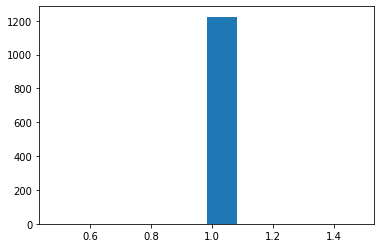

In [1460]:
import matplotlib.pyplot as plt
plt.hist(y_pred)

In [1461]:
y_train.iloc[null_indexes] = y_pred

In [1462]:
y_train = np.round(y_train)

In [1463]:
X_train = new_X_train.drop(columns=column_groupby)

In [1464]:
evaluate_linear_models(X_train, y_train)

Model: LinearRegression
Train QWK Score: 0.7459837990794217
Validation QWK Score: 0.7427130044843049

Model: Ridge
Train QWK Score: 0.7331514793896992
Validation QWK Score: 0.7362281270252754

Model: Lasso
Train QWK Score: 0.307357767322726
Validation QWK Score: 0.31580777039241315

Model: ElasticNet
Train QWK Score: 0.5241548922888275
Validation QWK Score: 0.5460984933663143



{'LinearRegression': {'Train QWK Score': np.float64(0.7459837990794217),
  'Validation QWK Score': np.float64(0.7427130044843049)},
 'Ridge': {'Train QWK Score': np.float64(0.7331514793896992),
  'Validation QWK Score': np.float64(0.7362281270252754)},
 'Lasso': {'Train QWK Score': np.float64(0.307357767322726),
  'Validation QWK Score': np.float64(0.31580777039241315)},
 'ElasticNet': {'Train QWK Score': np.float64(0.5241548922888275),
  'Validation QWK Score': np.float64(0.5460984933663143)}}

In [1465]:
# evaluate_tree_models(X_train, y_train)

In [1466]:
local_X_train, local_X_test, local_y_train, local_y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [1467]:
evaluate_linear_models(local_X_train, local_y_train)

Model: LinearRegression
Train QWK Score: 0.7585319140705697
Validation QWK Score: 0.7941264630316871

Model: Ridge
Train QWK Score: 0.7445739461976997
Validation QWK Score: 0.7641211009821381

Model: Lasso
Train QWK Score: 0.2687618768469995
Validation QWK Score: 0.29513411107787413

Model: ElasticNet
Train QWK Score: 0.48049931572340077
Validation QWK Score: 0.4855622342499162



{'LinearRegression': {'Train QWK Score': np.float64(0.7585319140705697),
  'Validation QWK Score': np.float64(0.7941264630316871)},
 'Ridge': {'Train QWK Score': np.float64(0.7445739461976997),
  'Validation QWK Score': np.float64(0.7641211009821381)},
 'Lasso': {'Train QWK Score': np.float64(0.2687618768469995),
  'Validation QWK Score': np.float64(0.29513411107787413)},
 'ElasticNet': {'Train QWK Score': np.float64(0.48049931572340077),
  'Validation QWK Score': np.float64(0.4855622342499162)}}

In [1468]:
reg_2 = LinearRegression()
reg_2.fit(local_X_train, local_y_train)
reg_2.score(local_X_test, local_y_test)

local_y_train_pred = reg_2.predict(local_X_train)
local_y_test_pred = reg_2.predict(local_X_test)

# local_y_train_pred = np.round(local_y_train_pred).astype(int)
# local_y_test_pred = np.round(local_y_test_pred).astype(int)

In [1469]:
conditions_train = [local_y_train_pred <= 0.5, local_y_train_pred <= 1.5, local_y_train_pred >= 2.5]
choices = [0, 1, 2]
local_y_train_pred = np.select(conditions_train, choices, default=1)

conditions_test = [local_y_test_pred <= 0.5, local_y_test_pred <= 1.5, local_y_test_pred >= 2.5]
choices = [0, 1, 2]
local_y_test_pred = np.select(conditions_test, choices, default=1)

In [1470]:
from sklearn.metrics import classification_report

print(classification_report(local_y_test, local_y_test_pred))


              precision    recall  f1-score   support

         0.0       0.96      0.68      0.79       311
         1.0       0.69      0.98      0.81       397
         2.0       0.36      0.05      0.09        76
         3.0       0.00      0.00      0.00         8

    accuracy                           0.76       792
   macro avg       0.50      0.43      0.42       792
weighted avg       0.76      0.76      0.73       792



c:\Users\Mariana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mariana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mariana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [1471]:
# ridge_model = Ridge(alpha=0.1)
# ridge_model.fit(local_X_train, local_y_train)

# print(ridge_model.score(local_X_test, local_y_test))

# local_y_train_pred = ridge_model.predict(local_X_train)
# local_y_test_pred = ridge_model.predict(local_X_test)

# local_y_train_pred = np.round(local_y_train_pred).astype(int)
# local_y_test_pred = np.round(local_y_test_pred).astype(int)

In [1472]:
# from sklearn.model_selection import GridSearchCV

# # Define a range of alphas to test
# alphas = [0.1, 1.0, 10, 100]
# ridge_cv = GridSearchCV(Ridge(), {'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
# ridge_cv.fit(local_X_train, local_y_train)

# print("Best alpha:", ridge_cv.best_params_['alpha'])

In [1473]:
from sklearn.metrics import cohen_kappa_score

qwk_score_train = cohen_kappa_score(local_y_train, local_y_train_pred, weights='quadratic')
qwk_score_val = cohen_kappa_score(local_y_test, local_y_test_pred, weights='quadratic')
print("Train QWK Score:", qwk_score_train)
print("Validation QWK Score:", qwk_score_val)


Train QWK Score: 0.6232876033608782
Validation QWK Score: 0.6407297676594417


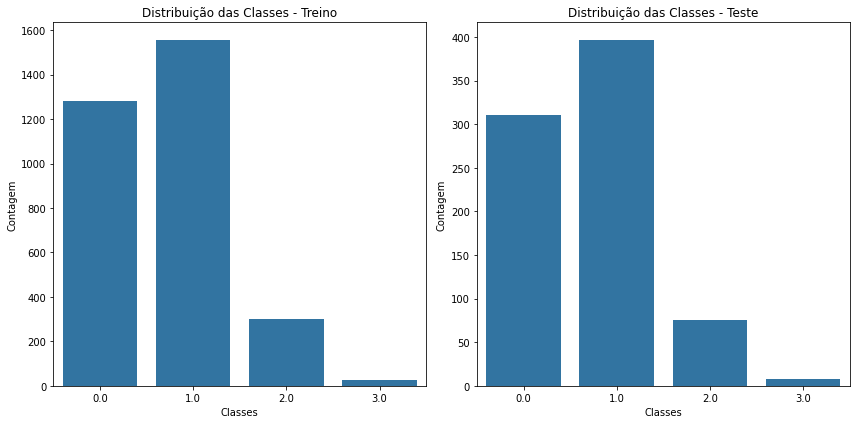

In [1474]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que você tenha um DataFrame `train` e `test`, e a coluna `target` contém a variável alvo
plt.figure(figsize=(12, 6))

# Treino
plt.subplot(1, 2, 1)
sns.countplot(x='sii', data=pd.DataFrame(local_y_train))
plt.title('Distribuição das Classes - Treino')
plt.xlabel('Classes')
plt.ylabel('Contagem')

# Teste
plt.subplot(1, 2, 2)
sns.countplot(x='sii', data=pd.DataFrame(local_y_test))
plt.title('Distribuição das Classes - Teste')
plt.xlabel('Classes')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [1475]:
# for column in columns_corr:
#     plt.figure(figsize=(12, 6))

#     # Treino
#     sns.kdeplot(local_X_train[column], label='Treino', color='blue')
#     sns.kdeplot(local_X_test[column], label='Teste', color='red')
#     plt.title(f'Distribuição {column} - Treino vs Teste')
#     plt.xlabel('Valores da Feature')
#     plt.ylabel('Densidade')
#     plt.legend()
#     plt.show()

In [1476]:
all_columns

['PCIAT-PCIAT_Total',
 'Median_FGC-FGC_CU',
 'Min_Physical-Systolic_BP',
 'Min_Physical-Diastolic_BP',
 'Median_Physical-BMI',
 'Median_BIA-BIA_BMC',
 'Min_BIA-BIA_BMI',
 'Max_avg_enmo']

In [1477]:
column_agg
# print(columns_agg_after)

['FGC-FGC_CU',
 'Physical-Systolic_BP',
 'Physical-Diastolic_BP',
 'Physical-BMI',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'avg_enmo']

In [1478]:
X_test_predict = X_test.loc[:, column_agg + other_columns]

In [1479]:
for column in column_agg:
    index = column_agg.index(column)
    X_test_predict[columns_corr[index]] = X_test_predict[column].fillna(df_agg[columns_corr[index]].mean())

In [1480]:
X_test_predict = X_test_predict.loc[:, other_columns + columns_corr]
y_test = reg_2.predict(X_test_predict)

In [1481]:
y_test

array([-0.01370377, -0.16150566,  1.40106842,  1.60583418,  1.23587417,
        2.25529081,  1.51494868,  0.25030295,  1.23587417,  1.23587417,
        1.23587417,  1.23587417,  2.72430992,  0.57501096,  1.23587417,
        2.14116314,  0.26174952,  0.81369632,  2.12755303,  1.23587417])

In [1482]:
conditions = [y_test <= 0.5, y_test <= 1.5, y_test >= 2.5]
choices = [0, 1, 2]
y_test_round = np.select(conditions, choices, default=1)

In [1483]:
print(y_test)

[-0.01370377 -0.16150566  1.40106842  1.60583418  1.23587417  2.25529081
  1.51494868  0.25030295  1.23587417  1.23587417  1.23587417  1.23587417
  2.72430992  0.57501096  1.23587417  2.14116314  0.26174952  0.81369632
  2.12755303  1.23587417]


In [1484]:
df_y_test = pd.DataFrame({'id': X_test['id'], 'sii': y_test_round})

In [1485]:
from datetime import datetime
df_y_test.to_csv(f'submission.csv', index=False)

In [1486]:
df_y_test

,id,sii
0,00008ff9,0
1,000fd460,0
2,00105258,1
3,00115b9f,1
4,0016bb22,1
5,001f3379,1
6,0038ba98,1
7,0068a485,0
8,0069fbed,1
9,0083e397,1


In [1487]:
# import pandas as pd
# original_X_train = pd.read_csv('child-mind-institute-problematic-internet-use/train.csv').iloc[:, :-1]

# pd.concat([X_train,y_train, original_X_train], axis=1).to_csv('df_final_to_powerbi_2.csv')

In [1488]:
# pd.concat([X_train,y_train, original_X_train], axis=1)

In [1489]:
pd.concat([X_test_predict, df_y_test], axis=1)

,Median_FGC-FGC_CU,Min_Physical-Systolic_BP,Min_Physical-Diastolic_BP,Median_Physical-BMI,Median_BIA-BIA_BMC,Min_BIA-BIA_BMI,Max_avg_enmo,id,sii
0,0.000000,94.763441,50.55914,16.877316,2.668550,16.879200,0.071391,00008ff9,0
1,3.000000,122.000000,75.00000,14.035590,2.579490,14.037100,0.071391,000fd460,0
2,20.000000,117.000000,65.00000,16.648696,4.494338,15.568655,0.071391,00105258,1
3,18.000000,117.000000,60.00000,18.292347,3.841910,18.294300,0.047388,00115b9f,1
4,12.445055,94.763441,50.55914,19.788974,4.494338,15.568655,0.071391,0016bb22,1
5,12.000000,102.000000,60.00000,22.279952,4.330360,30.186500,0.011926,001f3379,1
6,9.000000,163.000000,123.00000,19.660760,3.782710,19.662900,0.071391,0038ba98,1
7,0.000000,116.000000,71.00000,16.861286,4.057260,16.863100,0.071391,0068a485,0
8,12.445055,94.763441,50.55914,19.788974,4.494338,15.568655,0.071391,0069fbed,1
9,12.445055,94.763441,50.55914,19.788974,4.494338,15.568655,0.071391,0083e397,1
